In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd


In [ ]:
class RetinalDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_id = self.labels_df.iloc[idx, 0]   # ID column
        img_path = f"{self.root_dir}/{img_id}.png"
        image = Image.open(img_path).convert('RGB')
        label = self.labels_df.iloc[idx, 1]    # Disease_Risk column

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # standard ImageNet normalization
])

In [ ]:
train_dataset = RetinalDataset(
    csv_file='/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv',   # path to your CSV
    root_dir='/content/drive/MyDrive/eye_dataset/Training_Set/Training',           # folder containing your images
    transform=transform
)

val_dataset=RetinalDataset(
    csv_file='/content/drive/MyDrive/eye_dataset/Evaluation_Set/normalities_prob_val.csv',
    root_dir='/content/drive/MyDrive/eye_dataset/Evaluation_Set/Validation'
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader=DataLoader(val_dataset,batch_size=16,shuffle=False,num_workers=2);

In [ ]:
import pandas as pd

# Read training CSV
train_csv_path = '/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv'
train_df = pd.read_csv(train_csv_path)
print("Training CSV:")
print(train_df.head())  # Shows the first 5 rows

# Read validation CSV
val_csv_path = '/content/drive/MyDrive/eye_dataset/Evaluation_Set/normalities_prob_val.csv'
val_df = pd.read_csv(val_csv_path)
print("\nValidation CSV:")
print(val_df.head())  # Shows the first 5 rows


Training CSV:
   ID  Disease_Risk
0   1             1
1   2             1
2   3             1
3   4             1
4   5             1

Validation CSV:
   ID  Disease_Risk
0   1             1
1   2             1
2   3             1
3   4             1
4   5             1


In [ ]:
import pandas as pd

# Load the CSVs
train_df = pd.read_csv('/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv')
val_df = pd.read_csv('/content/drive/MyDrive/eye_dataset/Evaluation_Set/normalities_prob_val.csv')

# Get number of rows
num_train_rows = train_df.shape[0]
num_val_rows = val_df.shape[0]

print(f"Total rows in Training CSV: {num_train_rows}")
print(f"Total rows in Validation CSV: {num_val_rows}")


Total rows in Training CSV: 1920
Total rows in Validation CSV: 640


In [ ]:
print(f"Total number of images in the dataset: {len(train_dataset)}")

print(f"Total number of images in the dataset: {len(val_dataset)}")

Total number of images in the dataset: 1920
Total number of images in the dataset: 640


In [ ]:
# Get a single batch of data
images, labels = next(iter(train_loader))

print(f"Batch size: {images.size(0)}")  # This will print batch size
print(f"Image shape: {images.shape}")   # This will print the shape of the images (e.g., [batch_size, 3, 300, 300])
print(f"Labels: {labels}")              # This will print the labels corresponding to the batch


Batch size: 16
Image shape: torch.Size([16, 3, 240, 240])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])


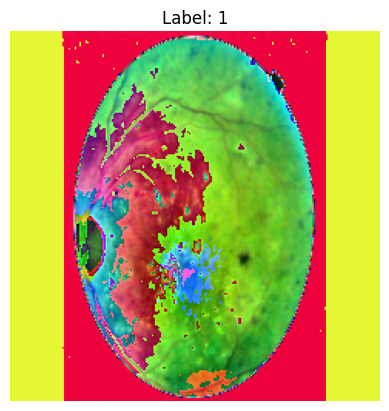

In [ ]:
import matplotlib.pyplot as plt

# Get a sample image from the dataset
sample_image, sample_label = train_dataset[0]  # Get the first image and label

# Convert tensor to PIL Image for visualization
sample_image = transforms.ToPILImage()(sample_image)

# Display the image
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=d6a63544bbbc445da2ae273c0c5b3935d05501bbef7ae87f3

In [ ]:
from efficientnet_pytorch import EfficientNet

In [ ]:
# 2. Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet

# 3. Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 4. Load your model
model = EfficientNet.from_pretrained('efficientnet-b1')

# 5. Modify the final layer to match your number of classes
num_classes = 8  # 🔥 Replace 8 with the actual number of classes in your eye dataset
model._fc = nn.Linear(model._fc.in_features, num_classes)

model = model.to(device)

# 6. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# 7. Training + Validation loop
num_epochs = 10  # You can adjust

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}]"
          f" Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}%"
          f" || Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%")

print("Training completed ✅")

Using device: cuda


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 263MB/s]


Loaded pretrained weights for efficientnet-b1


In [ ]:
# 4. Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 7. Load EfficientNet-B1
model = EfficientNet.from_pretrained('efficientnet-b1')

# 8. Modify the final fully connected layer
model._fc = nn.Linear(model._fc.in_features, 1)  #

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)  # (batch, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = torch.sigmoid(outputs)
        preds = preds > 0.5
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs)
            preds = preds > 0.5
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {running_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}% "
          f"|| Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%")

print("Training Completed ✅")